In [1]:
import pandas as pd

In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [10]:
import plotly.express as px

fig = px.histogram(wine, x='quality')
fig.show()

In [12]:
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [14]:
fig = px.histogram(wine, x='quality', color='color')
fig.show()

In [15]:
x = wine.drop(['color'], axis=1)
y = wine['color']

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=13)

In [18]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3913, 1284], dtype=int64))

In [19]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=x_train['quality'], name='Train'))
fig.add_trace(go.Histogram(x=x_test['quality'], name='Test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [25]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)

In [22]:
y_pred_tr

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [23]:
accuracy_score(y_train, y_pred_tr)

0.9553588608812776

In [26]:
accuracy_score(y_test, y_pred_test)

0.9569230769230769

In [28]:
fig = go.Figure()
fig.add_trace(go.Box(y=x['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=x['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=x['quality'], name='quality'))

fig.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MM = MinMaxScaler()
SS = StandardScaler()

SS.fit(x)
MM.fit(x)

x_SS = SS.transform(x)
x_MM = MM.transform(x)

In [33]:
x_SS_pd = pd.DataFrame(x_SS, columns=x.columns)
x_MM_pd = pd.DataFrame(x_MM, columns=x.columns)

In [34]:
fig = go.Figure()
fig.add_trace(go.Box(y=x_SS_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=x_SS_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=x_SS_pd['quality'], name='quality'))
fig.show()

In [35]:
fig = go.Figure()
fig.add_trace(go.Box(y=x_MM_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=x_MM_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=x_MM_pd['quality'], name='quality'))
fig.show()

In [36]:
def px_box(target_df):
    fig = go.Figure()
    fig.add_trace(go.Box(y=target_df['fixed acidity'], name='fixed acidity'))
    fig.add_trace(go.Box(y=target_df['chlorides'], name='chlorides'))
    fig.add_trace(go.Box(y=target_df['quality'], name='quality'))
    fig.show()

In [38]:
px_box(x_SS_pd)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_MM_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)
accuracy_score(y_train, y_pred_tr)
accuracy_score(y_test, y_pred_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.9553588608812776
Test Acc:  0.9569230769230769


In [ ]:
0.9553588608812776
0.9569230769230769

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_SS_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)
accuracy_score(y_train, y_pred_tr)
accuracy_score(y_test, y_pred_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.9553588608812776
Test Acc:  0.9569230769230769


In [41]:
dict(zip(x_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

In [42]:
wine['taste'] = [1 if grade > 5 else 0 for grade in wine['quality']]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [62]:
x = wine.drop(['taste'], axis=1)
y = wine['taste']

In [67]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [65]:
x.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'color']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [50]:
accuracy_score(y_train, y_pred_tr)
accuracy_score(y_test, y_pred_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  1.0
Test Acc:  1.0


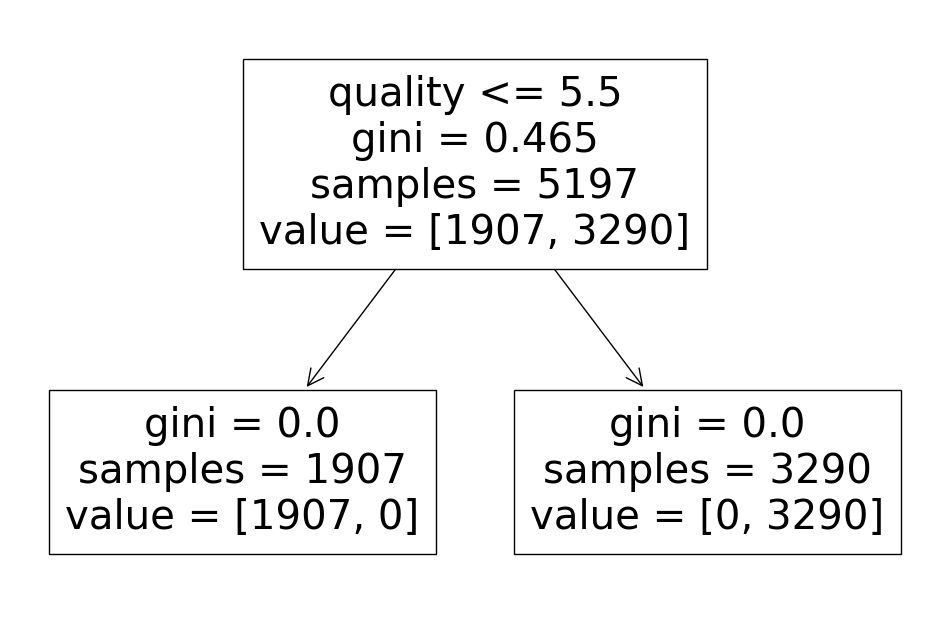

In [56]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,8))
tree.plot_tree(wine_tree, feature_names=x.columns.tolist());

In [72]:
x = wine.drop(['taste','quality'], axis=1)
y = wine['taste']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [75]:
y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)

In [76]:
accuracy_score(y_train, y_pred_tr)
accuracy_score(y_test, y_pred_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7294593034442948
Test Acc:  0.7161538461538461


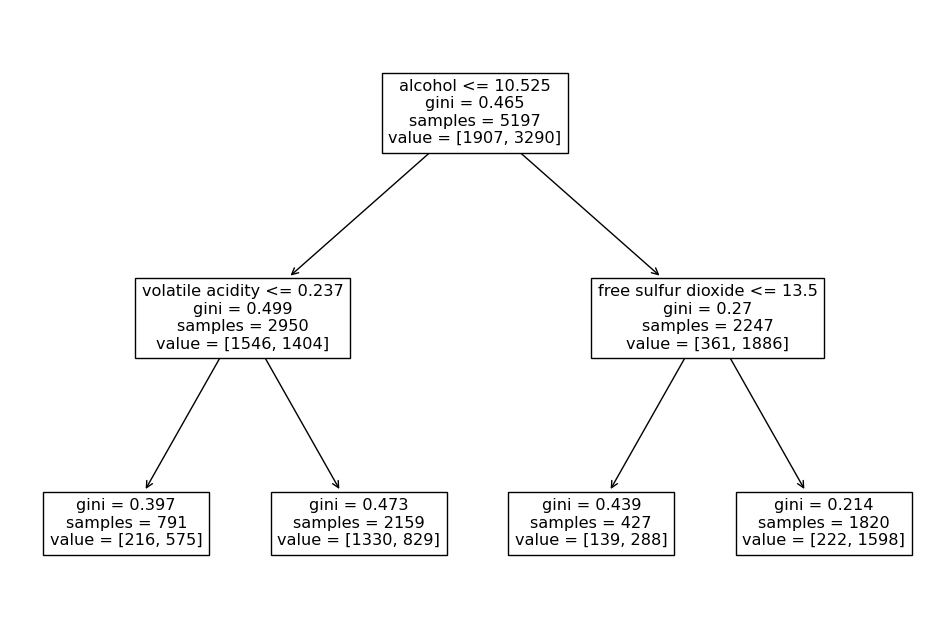

In [77]:
plt.figure(figsize=(12,8))
tree.plot_tree(wine_tree, feature_names=x.columns.tolist());

In [78]:
dict(zip(x_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.2714166536849971,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.0,
 'free sulfur dioxide': 0.057120460609986594,
 'total sulfur dioxide': 0.0,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.6714628857050162,
 'color': 0.0}